In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

Generate Random Data 


In [14]:
category = ['Food','Travel','Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

n = 500
data_range = pd.date_range(start='1/1/2019', periods=n)

category_data = [random.choice(category) for i in range(n)]

data = {
    'Date': data_range,
    'Category': category_data,
    'Like': np.random.randint(0, 1000, n)
}

print(data)




{'Date': DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14'],
              dtype='datetime64[ns]', length=500, freq='D'), 'Category': ['Food', 'Culture', 'Food', 'Health', 'Food', 'Travel', 'Fashion', 'Food', 'Culture', 'Fashion', 'Travel', 'Food', 'Food', 'Fashion', 'Food', 'Culture', 'Food', 'Fashion', 'Food', 'Travel', 'Travel', 'Family', 'Fashion', 'Music', 'Family', 'Travel', 'Fitness', 'Family', 'Fitness', 'Family', 'Food', 'Family', 'Fashion', 'Health', 'Culture', 'Music', 'Family', 'Travel', 'Family', 'Family', 'Health', 'Culture', 'Fashion', 'Health', 'Health', 'Culture', 'Fashion', 'Family', 'Culture', 'Fashion', 'Family', 'Music', 'Music', 'Cu

Set my data into data frame using Pandas 

In [15]:
df = pd.DataFrame(data)
print(df.head(3))

print(df.info())

print(df.describe())

#get the count of total like 
total_like = df['Like'].sum()
print(total_like)

        Date Category  Like
0 2019-01-01     Food   103
1 2019-01-02  Culture     1
2 2019-01-03     Food   570
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Like      500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB
None
                      Date        Like
count                  500  500.000000
mean   2019-09-07 12:00:00  507.232000
min    2019-01-01 00:00:00    1.000000
25%    2019-05-05 18:00:00  247.750000
50%    2019-09-07 12:00:00  494.000000
75%    2020-01-10 06:00:00  768.500000
max    2020-05-14 00:00:00  999.000000
std                    NaN  292.073738
253616


In [20]:
#conevrt the date to datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df.info())

#conver the like to int
df['Like'] = df['Like'].astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Like      500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Like      500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB
None


In [21]:
print(df.isna().sum())
#remove all the null 
df = df.dropna()

Date        0
Category    0
Like        0
dtype: int64


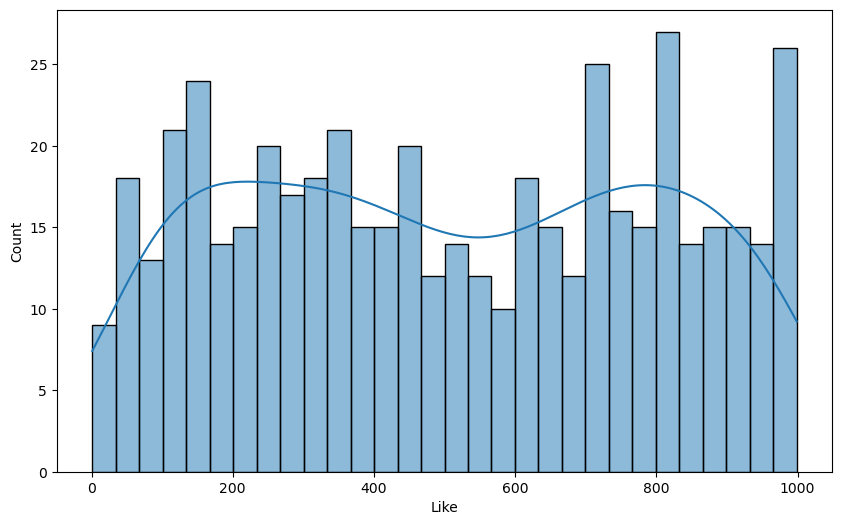

In [26]:
#visualisation on the likes 
plt.figure(figsize=(10, 6))
sns.histplot(df['Like'], bins=30, kde=True)
plt.show()


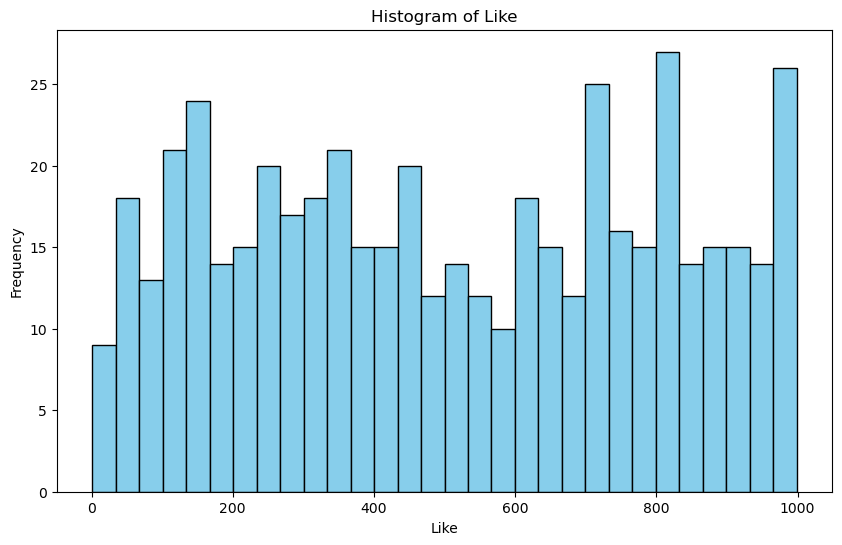

In [30]:
#histogram of like using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['Like'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.title('Histogram of Like')  
plt.show()

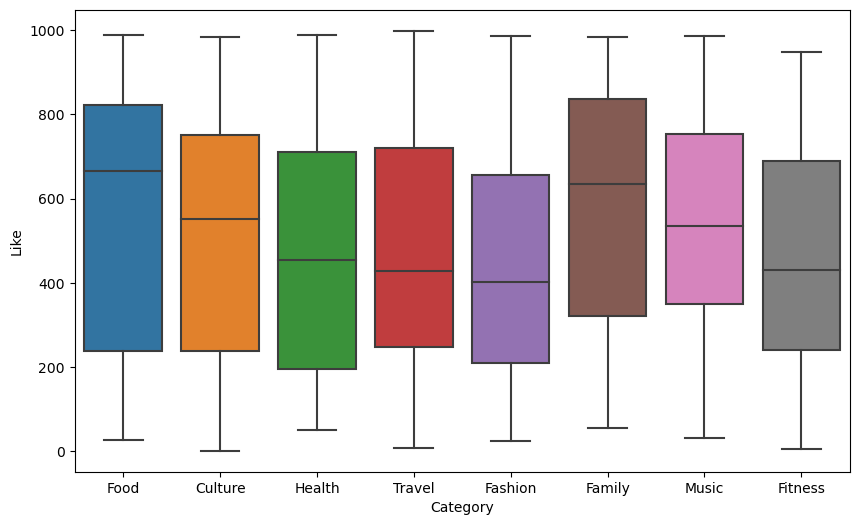

In [33]:
#boxplot for like
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Like', data=df)

plt.show()


In [36]:
print(df['Like'].mean())

group_by_category = df.groupby('Category')
print(group_by_category['Like'].mean())

507.232
Category
Culture    505.114754
Family     577.935897
Fashion    445.220588
Fitness    455.740000
Food       561.666667
Health     469.571429
Music      548.365079
Travel     461.206897
Name: Like, dtype: float64
